In [71]:
def point_inside_polygon(lat,lng,poly):
    p1 = Point(lng,lat)
    if p1.within(poly):
        return True
    else:
        return False
    
def get_neighbourhood(row,gdf):
    for ix, area in gdf.iterrows():
        is_in_area=False
        if row['lat'] and row['lon'] and row['lat']!=0 and row['lon']!=0:
            is_in_area = point_inside_polygon(row['lat'], row['lon'], area['geometry'])
            if is_in_area:
                #found area, exit
                return area['name']
    return None

In [61]:
import pandas as pd
import numpy as np
import geopandas as gpd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from tqdm import tqdm
import matplotlib.pyplot as plt 
tqdm.pandas()
from shapely.geometry import Point, Polygon
data_path = '../data/'

/Users/ida/opt/anaconda3/lib/python3.8/site-packages/tqdm/std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [38]:
def convert_columns_to_lowercase(df):
    df = df.rename(columns = {k:k.lower() for k in df.columns})
    return df

In [39]:
df_covid = pd.read_csv(data_path + 'COVID19_by_Neighborhood.csv')
df_covid = convert_columns_to_lowercase(df_covid)

In [68]:
gdf = gpd.read_file(data_path + 'LA_Times_Neighborhood_Boundaries-shp/cfbcc20d-2c5d-4c30-9dfa-627d46ec1a742020328-1-9ulknm.pzqsm.shp')
gdf = convert_columns_to_lowercase(gdf)

In [42]:
df_crime = pd.read_csv(data_path + 'Crime_Data_from_2020_to_Present.csv')
df_crime = convert_columns_to_lowercase(df_crime)

In [49]:
dfc = df_crime.head(10000)

In [72]:
dfc['name'] = dfc.progress_apply(lambda row: get_neighbourhood(row,gdf), axis = 1)



100%|██████████| 10000/10000 [00:38<00:00, 257.16it/s]
<ipython-input-72-5acc60d73ec9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc['name'] = dfc.progress_apply(lambda row: get_neighbourhood(row,gdf), axis = 1)


In [74]:
dfc['crm cd desc'].unique()

array(['BATTERY - SIMPLE ASSAULT',
       'VANDALISM - MISDEAMEANOR ($399 OR UNDER)',
       'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
       'RAPE, FORCIBLE', 'SHOPLIFTING - PETTY THEFT ($950 & UNDER)',
       'OTHER MISCELLANEOUS CRIME',
       'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
       'CRIMINAL THREATS - NO WEAPON DISPLAYED', 'BURGLARY FROM VEHICLE',
       'ARSON', 'VEHICLE - STOLEN', 'THEFT PLAIN - PETTY ($950 & UNDER)',
       'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT', 'ROBBERY',
       'BRANDISH WEAPON', 'BURGLARY', 'BATTERY POLICE (SIMPLE)',
       'ORAL COPULATION', 'INTIMATE PARTNER - SIMPLE ASSAULT',
       'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)',
       'THEFT OF IDENTITY', 'THEFT, PERSON',
       'BATTERY WITH SEXUAL CONTACT', 'BIKE - STOLEN', 'TRESPASSING',
       'THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER)',
       'FAILURE TO YIELD', 'THEFT FROM MOTOR VEHICLE - ATTEMPT',
       'THROWING OBJECT AT MOVING V

In [78]:
crime_counts = dfc[['name','dr_no']].groupby('name').count().reset_index().rename(columns = {'dr_no':'n'})

In [64]:
# fig, ax = plt.subplots(figsize = (30,30)) 
# gdf[gdf.location!='CENTRAL'].plot(ax = ax, color = 'blue')
# gdf[gdf.location=='CENTRAL'].plot(ax = ax, color = 'red')

In [67]:
gdf[gdf.fid==75]

,fid,comty_name,cert,shape_leng,shape_area,location,cases,case_rate,deaths,death_rate,date,shape__are,shape__len,geometry
74,75,BEVERLYWOOD,None,32869.601642,31737507.73,BEVERLYWOOD,47,357,0,0,2020-06-18,4.305354e+06,12111.940645,"POLYGON ((-118.39912 34.05702, -118.39879 34.0..."


In [79]:
gdf = gdf.merge(crime_counts,on = 'name',how = 'left')

In [80]:
gdf.head()

,objectid,name,geometry,n
0,1,Adams-Normandie,"POLYGON ((-118.30069 34.03731, -118.30388 34.0...",69.0
1,2,Arleta,"POLYGON ((-118.44255 34.26412, -118.44240 34.2...",4.0
2,3,Arlington Heights,"POLYGON ((-118.31862 34.05306, -118.31673 34.0...",57.0
3,4,Atwater Village,"MULTIPOLYGON (((-118.27886 34.15321, -118.2788...",23.0
4,5,Baldwin Hills/Crenshaw,"POLYGON ((-118.36102 34.02532, -118.36026 34.0...",146.0


<ipython-input-86-594d6ca9e5b2>:27: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s=row['n'], xy=row['coords'],horizontalalignment='center',fontsize=9)


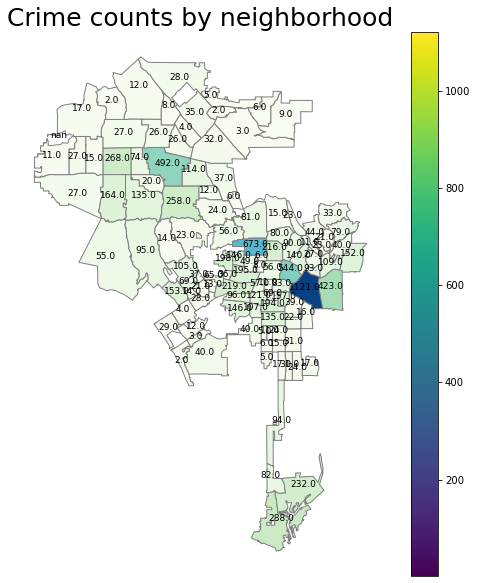

In [86]:
fig, ax = plt.subplots(1,figsize = (10,10)) # create figure and axes for Matplotlib
ax.set_title('Crime counts by neighborhood',
            fontdict={'fontsize': '25', 'fontweight' : '3'})

vmin = gdf.n.min()
vmax = gdf.n.max()

gdf.plot(column = 'n',cmap = 'GnBu',linewidth = 1, ax = ax, edgecolor = '.5')
# remove the axis
ax.axis('off')

# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm.set_array([])

#add colorbar
cbar = fig.colorbar(sm)

# Add location for the labels
gdf['coords'] = gdf['geometry'].apply(lambda x: x.representative_point().coords[:])
gdf['coords'] = [coords[0] for coords in gdf['coords']]

# Display names 
for idx, row in gdf.iterrows():
    plt.annotate(s=row['n'], xy=row['coords'],horizontalalignment='center',fontsize=9)

Matplotlib colormaps:
https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [104]:
gdf2 = gpd.read_file(data_path + 'COVID19_by_Neighborhood-shp/COVID19_by_Neighborhood.shp')
gdf2 = convert_columns_to_lowercase(gdf2)


In [105]:
gdf2.head()

,fid,comty_name,cert,shape_leng,shape_area,location,cases,case_rate,deaths,death_rate,date,shape__are,shape__len,geometry
0,1,GRANADA HILLS,yes,89564.685903,4.264128e+08,GRANADA HILLS,457,785,48,82,2020-06-18,5.818514e+07,33094.502125,"POLYGON ((-118.54219 34.29860, -118.54084 34.2..."
1,2,PORTER RANCH,yes,73616.951350,2.267371e+08,PORTER RANCH,111,312,7,20,2020-06-18,3.093173e+07,27183.552463,"POLYGON ((-118.59618 34.27462, -118.59377 34.2..."
2,3,LAKEVIEW TERRACE,yes,75477.956189,1.448471e+08,LAKEVIEW TERRACE,158,1203,4,30,2020-06-18,1.975813e+07,27863.458449,"POLYGON ((-118.40834 34.28671, -118.40755 34.2..."
3,4,MISSION HILLS,yes,50728.509850,1.061586e+08,MISSION HILLS,214,887,10,41,2020-06-18,1.447757e+07,18746.395093,"POLYGON ((-118.47067 34.29432, -118.46554 34.2..."
4,5,ANGELES NATIONAL FOREST,yes,92240.837542,1.458565e+08,ANGELES NATIONAL FOREST,1,2500,0,0,2020-06-18,1.989453e+07,34046.544055,"POLYGON ((-118.33605 34.28250, -118.33494 34.2..."


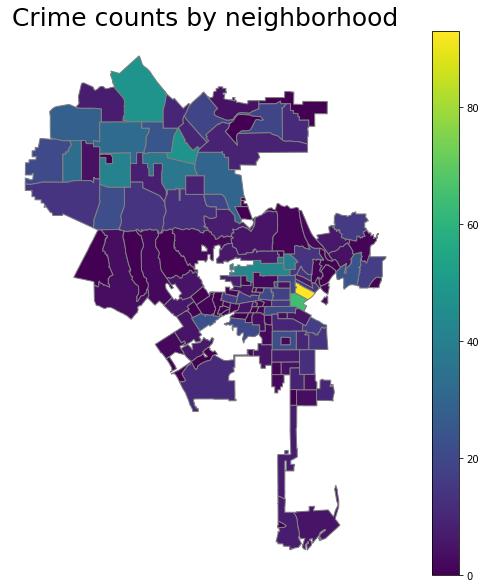

In [109]:
fig, ax = plt.subplots(1,figsize = (10,10)) # create figure and axes for Matplotlib
ax.set_title('Crime counts by neighborhood',
            fontdict={'fontsize': '25', 'fontweight' : '3'})

vmin = gdf2.deaths.min()
vmax = gdf2.deaths.max()

gdf2.plot(column = 'deaths',cmap = 'viridis',linewidth = 1, ax = ax, edgecolor = '.5')
# remove the axis
ax.axis('off')

# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm.set_array([])

#add colorbar
cbar = fig.colorbar(sm)

# Add location for the labels
gdf['coords'] = gdf['geometry'].apply(lambda x: x.representative_point().coords[:])
gdf['coords'] = [coords[0] for coords in gdf['coords']]

# # Display names 
# for idx, row in gdf.iterrows():
#     plt.annotate(s=row['n'], xy=row['coords'],horizontalalignment='center',fontsize=9)

In [102]:
gdf2 = gdf2.merge(df_covid[['fid','cases','case_rate','deaths','death_rate']], on = 'fid')

In [103]:
gdf2.head()

,fid,comty_name,cert,shape_leng,shape_area,location,cases_x,case_rate_x,deaths_x,death_rate_x,date,shape__are,shape__len,geometry,cases_y,case_rate_y,deaths_y,death_rate_y,cases,case_rate,deaths,death_rate
0,1,GRANADA HILLS,yes,89564.685903,4.264128e+08,GRANADA HILLS,457,785,48,82,2020-06-18,5.818514e+07,33094.502125,"POLYGON ((-118.54219 34.29860, -118.54084 34.2...",14535,17640,184,223,14535,17640,184,223
1,2,PORTER RANCH,yes,73616.951350,2.267371e+08,PORTER RANCH,111,312,7,20,2020-06-18,3.093173e+07,27183.552463,"POLYGON ((-118.59618 34.27462, -118.59377 34.2...",5745,9873,137,235,5745,9873,137,235
2,3,LAKEVIEW TERRACE,yes,75477.956189,1.448471e+08,LAKEVIEW TERRACE,158,1203,4,30,2020-06-18,1.975813e+07,27863.458449,"POLYGON ((-118.40834 34.28671, -118.40755 34.2...",2140,6013,23,65,2140,6013,23,65
3,4,MISSION HILLS,yes,50728.509850,1.061586e+08,MISSION HILLS,214,887,10,41,2020-06-18,1.447757e+07,18746.395093,"POLYGON ((-118.47067 34.29432, -118.46554 34.2...",2116,16112,30,228,2116,16112,30,228
4,5,ANGELES NATIONAL FOREST,yes,92240.837542,1.458565e+08,ANGELES NATIONAL FOREST,1,2500,0,0,2020-06-18,1.989453e+07,34046.544055,"POLYGON ((-118.33605 34.28250, -118.33494 34.2...",3848,15951,96,398,3848,15951,96,398
